In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/bbc-text.csv -O bbc_text.csv

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
stopwords = ["a", "about", "above", "after", "again", "against", "all",
             "am", "an", "and", "any", "are", "as", "at", "be", "because",
             "been", "before", "being", "below", "between", "both", "but",
             "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have",
             "having", "he", "he'd", "he'll", "he's", "her", "here", "here's",
             "hers", "herself", "him", "himself", "his", "how", "how's", "i",
             "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's",
             "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor",
             "of", "on", "once", "only", "or", "other", "ought", "our", "ours",
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll",
             "she's", "should", "so", "some", "such", "than", "that", "that's",
             "the", "their", "theirs", "them", "themselves", "then", "there",
             "there's", "these", "they", "they'd", "they'll", "they're", "they've",
             "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were",
             "what", "what's", "when", "when's", "where", "where's", "which",
             "while", "who", "who's", "whom", "why", "why's", "with", "would",
             "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

In [ ]:
sentences = []
labels = []

with open("bbc_text.csv", "r") as file:
  texts = csv.reader(file)
  next(texts)

  for text in texts:
    labels.append(text[0])
    sentence = text[1]

    for word in stopwords:
      if word in sentence:
        token = " " + word + " "
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace("  ", " ")

    sentences.append(sentence)

In [ ]:
train_size = int(len(sentences) * 0.8)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [ ]:
tokenizer = Tokenizer(num_words=1000, oov_token="")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding="post", maxlen=120)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding="post", maxlen=120)

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

label_word_index = label_tokenizer.word_index

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
model = Sequential()

model.add(layers.Embedding(1000, 16, input_length=120))
model.add(layers.Bidirectional(layers.LSTM(16)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist = model.fit(train_padded, training_label_seq, epochs=50, validation_data=(validation_padded, validation_label_seq))

Epoch 1/50
56/56 [==============================] - 36s 584ms/step - loss: 1.7370 - accuracy: 0.2028 - val_loss: 1.6642 - val_accuracy: 0.2449
Epoch 2/50
56/56 [==============================] - 4s 79ms/step - loss: 1.6143 - accuracy: 0.2438 - val_loss: 1.5885 - val_accuracy: 0.2382
Epoch 3/50
56/56 [==============================] - 6s 99ms/step - loss: 1.4932 - accuracy: 0.3421 - val_loss: 1.6131 - val_accuracy: 0.2562
Epoch 4/50
56/56 [==============================] - 5s 81ms/step - loss: 1.6364 - accuracy: 0.2972 - val_loss: 1.5762 - val_accuracy: 0.2427
Epoch 5/50
56/56 [==============================] - 4s 79ms/step - loss: 1.5010 - accuracy: 0.3882 - val_loss: 1.4384 - val_accuracy: 0.3820
Epoch 6/50
56/56 [==============================] - 6s 104ms/step - loss: 1.2992 - accuracy: 0.5135 - val_loss: 1.1766 - val_accuracy: 0.6404
Epoch 7/50
56/56 [==============================] - 4s 78ms/step - loss: 1.1285 - accuracy: 0.5758 - val_loss: 1.1080 - val_accuracy: 0.5888
Epoch 8/50

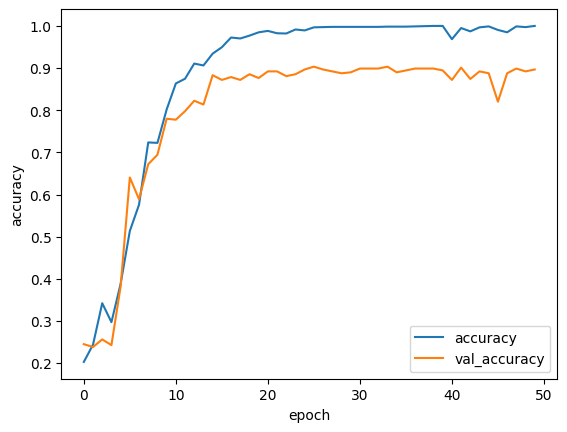

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])